# 02 – Feature Engineering and Windowing

Goal of this notebook:

- Inspect the interim data with RUL.
- Load the window-based features generated by the pipeline.
- Validate that windowing and RUL alignment are correct.
- Explore distributions of engineered features (rolling stats, FFT).


In [6]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paths / environment ---
project_root = Path.cwd().parent
sys.path.append(str(project_root))
print("Project root:", project_root)

# Plot config
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

from src.data_loading import load_dataframe
from src.make_features import FeatureConfig, generate_features

interim_path = project_root / "data" / "interim" / "train_fd001_with_rul.csv"
features_path = project_root / "data" / "processed" / "features_fd001.csv"

interim_path, features_path


Project root: /Users/arnavthakur/Documents/Data Science Projects/Industrial_Equipment_Failure_Prediction


(PosixPath('/Users/arnavthakur/Documents/Data Science Projects/Industrial_Equipment_Failure_Prediction/data/interim/train_fd001_with_rul.csv'),
 PosixPath('/Users/arnavthakur/Documents/Data Science Projects/Industrial_Equipment_Failure_Prediction/data/processed/features_fd001.csv'))

In [7]:
df_interim = load_dataframe(interim_path)
df_feats = load_dataframe(features_path)

df_interim.head(), df_feats.head()


(   unit  cycle  setting_1  setting_2  setting_3     s_2      s_3      s_4  \
 0     1      1    -0.0007    -0.0004      100.0  641.82  1589.70  1400.60   
 1     1      2     0.0019    -0.0003      100.0  642.15  1591.82  1403.14   
 2     1      3    -0.0043     0.0003      100.0  642.35  1587.99  1404.20   
 3     1      4     0.0007     0.0000      100.0  642.35  1582.79  1401.87   
 4     1      5    -0.0019    -0.0002      100.0  642.37  1582.85  1406.22   
 
      s_6     s_7  ...      s_9   s_11    s_12     s_13     s_14    s_15  s_17  \
 0  21.61  554.36  ...  9046.19  47.47  521.66  2388.02  8138.62  8.4195   392   
 1  21.61  553.75  ...  9044.07  47.49  522.28  2388.07  8131.49  8.4318   392   
 2  21.61  554.26  ...  9052.94  47.27  522.42  2388.03  8133.23  8.4178   390   
 3  21.61  554.45  ...  9049.48  47.13  522.86  2388.08  8133.83  8.3682   392   
 4  21.61  554.00  ...  9055.15  47.28  522.19  2388.04  8133.80  8.4294   393   
 
     s_20     s_21  RUL  
 0  39.06 

In [8]:
df_interim.shape, df_feats.shape
df_feats[["unit", "cycle", "RUL"]].head()


,unit,cycle,RUL
0,1,30,162.0
1,1,31,161.0
2,1,32,160.0
3,1,33,159.0
4,1,34,158.0


In [9]:
unit_id = 1

df_raw_u = df_interim[df_interim["unit"] == unit_id].sort_values("cycle")
df_feat_u = df_feats[df_feats["unit"] == unit_id].sort_values("cycle")

df_raw_u[["unit", "cycle", "RUL"]].head(35), df_feat_u[["unit", "cycle", "RUL"]].head()


(    unit  cycle  RUL
 0      1      1  191
 1      1      2  190
 2      1      3  189
 3      1      4  188
 4      1      5  187
 5      1      6  186
 6      1      7  185
 7      1      8  184
 8      1      9  183
 9      1     10  182
 10     1     11  181
 11     1     12  180
 12     1     13  179
 13     1     14  178
 14     1     15  177
 15     1     16  176
 16     1     17  175
 17     1     18  174
 18     1     19  173
 19     1     20  172
 20     1     21  171
 21     1     22  170
 22     1     23  169
 23     1     24  168
 24     1     25  167
 25     1     26  166
 26     1     27  165
 27     1     28  164
 28     1     29  163
 29     1     30  162
 30     1     31  161
 31     1     32  160
 32     1     33  159
 33     1     34  158
 34     1     35  157,
    unit  cycle    RUL
 0     1     30  162.0
 1     1     31  161.0
 2     1     32  160.0
 3     1     33  159.0
 4     1     34  158.0)

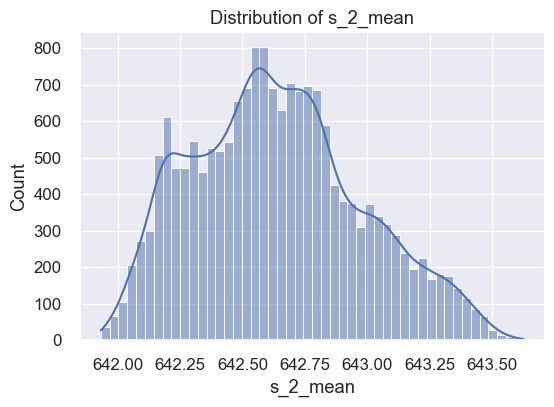

In [ ]:
feature_example = "s_2_mean"  

plt.figure(figsize=(6, 4))
sns.histplot(df_feats[feature_example], kde=True)
plt.title(f"Distribution of {feature_example}")
plt.show()


In [11]:
feature_cols = [c for c in df_feats.columns if c not in ["unit", "cycle", "RUL"]]
corr_with_rul = df_feats[feature_cols + ["RUL"]].corr()["RUL"].sort_values()

corr_with_rul.head(10), corr_with_rul.tail(10)


(s_17_mean   -0.721803
 s_3_mean    -0.720163
 s_4_max     -0.717968
 s_15_mean   -0.713110
 s_11_max    -0.712113
 s_4_mean    -0.711406
 s_2_mean    -0.710196
 s_11_mean   -0.705755
 s_15_max    -0.681337
 s_3_max     -0.674027
 Name: RUL, dtype: float64,
 s_20_min          0.677543
 s_7_min           0.680679
 s_12_mean         0.686203
 s_7_mean          0.687970
 s_12_min          0.688762
 s_20_mean         0.709054
 s_21_mean         0.715172
 RUL               1.000000
 setting_3_last         NaN
 s_6_max                NaN
 Name: RUL, dtype: float64)